# Gaia Data Release 2 (DR2) Assignment Key

## Intro to Astronomy 2021, Week 3


#### Written by Sarah Blunt, 2018. Updated by [Chetan Chawla](https://sites.google.com/view/chetanchawla), 2021

### Answers are marked by 🟢

### In this tutorial, you will:
- learn about the Astronomical Data Query Language (ADQL)
- use the Gaia DR2 Database and the NASA Exoplanet Archive to get Gaia parameters for the 10,000 closest stars
- plot a color-magnitude diagram

### Notes:
- This tutorial is challenging! If you spend more than 15 minutes stuck on a task, post about it on Piazza (you can post anonymously if you want). An instructor will help you out! Don't struggle needlessly.
- Make sure you complete the pandas and matplotlib tutorials before attempting this tutorial.

### Learn More About ADQL

1. Navigate to the Gaia ADQL interface. First, go [here](https://gea.esac.esa.int/archive/). Click "Search," then click "Advanced (ADQL)" (in the top left corner of the page). 

2. Read [this webpage](https://www.gaia.ac.uk/data/gaia-data-release-1/adql-cookbook) (only till *'Ten example ADQL queries'*; you can read the example queries if you want to go a step further!) 

3. Read slides 6-14 in [this powerpoint](https://www.cosmos.esa.int/documents/915837/915858/ADQL_handson_slides.pdf/652b9120-a3fe-4857-b5eb-933b476687ad).

   Try out some of the commands for yourself in the Gaia ADQL search bar you opened in step 1. Using the buttons that pop up to the right of your query results, you can download the results or view them in your browser. Hover over the buttons to see what they do.

   Don't worry if you don't understand everything in the powerpoint or the website! Pick out the most important slides/functions and summarize them for yourself. A quick ADQL reference guide can also be used [here](https://www.g-vo.org/pmwiki/uploads/About/adqlref_2016.pdf) 
   
   ** Note: wherever the powerpoint uses "gaiadr1.tgas_source," replace with "gaiadr2.gaia_source."

# Use the Gaia DR2 Database to Get Gaia Parameters for the 10,000 Closest Stars

### Write an ADQL query to get parameters of the 10,000 closest stars. Your query should return the following parameters:

- BP - RP color (bp_rp in the Gaia database)
- absolute g-band photometric magnitude 
- distance
- RA
- Dec
- radius
- effective temprature

<span style="color:red">ADQL QUERY COMMAND:</span>

🟢
`
SELECT TOP 10000
	phot_g_mean_mag + 5 * log10(parallax/1000) + 5 AS g_abs, bp_rp, 1/(parallax/1000) AS dist,
    ra, dec, radius_val, teff_val
FROM gaiadr2.gaia_source 
WHERE parallax > 0
ORDER BY parallax DESC
`

Here, we use 1/parallax (in arcseconds) as distance to the stars and alias it as dist. As parallax is in milliarcseconds(mas), we divide it by 1000 to get our distances in parsecs (pc). We order the data in Descending order of parallaxes to get the closest stars (having highest parallaxes).

### Download your Query Results as a csv file. 

### Hints:
- Distance (in parsecs) is the inverse of parallax (in arcseconds). Keep an eye on units! Gaia by default shows parallaxes in milliarcseconds (mas) .
- You can calculate absolute photometric magnitude in the gband using this formula: phot_g_mean_mag + 5 + 5 * log10(parallax/1000). You can alias this value and can use these in conditions, grouping, joins, or ordering the data.
- Find the names of the colums for RA, Dec, radius and effective temparature using the database window part in the *Advanced (ADQL)* tab in *'Search'* of the Gaia archive 
- You'll need to use "ORDER BY" in your ADQL command.
- Some Gaia sources have negative parallaxes due to instrumental imperfections. You'll need to add a line to your query specifying that parallax must be greater than 0. 
- Using the buttons that pop up to the right of your query results, you can download the results or view them in your browser. Hover over the buttons to see what they do.

# Plot a Color-Magnitude Diagram of the 10,000 Closest Stars

### 🟢1. Using [pandas.read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html), read your downloaded csv file into a pandas DataFrame

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

# Type your pd.read_csv command here: 
data = pd.read_csv('data/closest10k_stars.csv')

# HINTS: 
# - make sure the jupyter notebook and your csv file are in the same directory (or in a subdirectory as here)
# - your read_csv command should be 1 line of code

Populating the interactive namespace from numpy and matplotlib


### 🟢2. Using matplotlib.pyplot, make a scatterplot of BP-RP color vs absolute g-band magnitude. This is a [color-magnitude diagram](https://en.wikipedia.org/wiki/Hertzsprung%E2%80%93Russell_diagram)! 

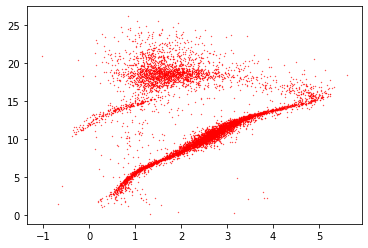

In [2]:
plt.figure()

# Type your plotting code here:
plt.scatter(data.bp_rp, data.g_abs, s=.1, color='red')
plt.show()

### 🟢More Fun things to try

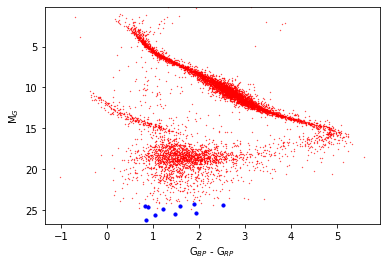

In [3]:
# Basic plot
plt.figure()
plt.scatter(data.bp_rp, data.g_abs, s=.1, color='red')

# - use plt.ylim to reverse the direction of the y axis. Max and Min of g_abs are used for the limits in y-axis
plt.ylim(max(data.g_abs),min(data.g_abs))

# - give your plot x and y labels.
plt.xlabel('G$_{BP}$ - G$_{RP}$')
plt.ylabel('M$_G$')

# - make the points red
'''(changed in initial plotting command using color='red')'''

# - make the 10 closest stars blue and bigger than others
data = data.sort_values(by = 'dist') # Making sure that the loaded dataframe is sorted by distance
data_no_nans = data[data.dist.notnull() & data.bp_rp.notnull() & data.g_abs.notnull()]  # remove NaN values for required stars
plt.scatter(
    data_no_nans.bp_rp.iloc[0:10], 
    data_no_nans.g_abs.iloc[0:10], 
    color='blue',  # blue instead of red for clarity in answer key
    s=10.   # make these points bigger for clarity in answer key
)
plt.show()


Final number of rows with no NaNs: 1184


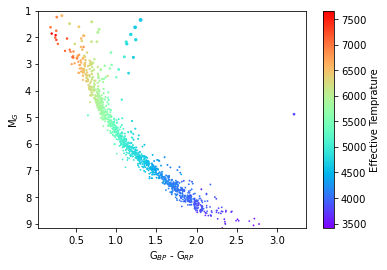

In [4]:
# More Fun Things to try if you're interested - Part 2:
# - give sizes of the stars as per their radii (only for stars having a non null radius_val in the data)
# - color the stars as per their effective tempratures (only for stars having a non null teff_val in the data)

data_plot = data.dropna() # Removing all NaNs from the data
print("Final number of rows with no NaNs:", data_plot.shape[0])
plt.figure()
# Using size as radius, color as effective temprature, and colormap rainbow 
# to have a close analogue to the rgb range of visible spectrum
plt.scatter(data_plot.bp_rp, data_plot.g_abs, 
            s=data_plot.radius_val, c=data_plot.teff_val, 
            cmap='rainbow')
plt.colorbar(label='Effective Temprature') # For the colorbar to appear
plt.ylim(max(data_plot.g_abs),min(data_plot.g_abs))
plt.xlabel('G$_{BP}$ - G$_{RP}$')
plt.ylabel('M$_G$')
plt.show()

## 🟢 Bonus Assignment

- **compare your results against Figure 1 and Figure 2 in this paper: [Babusiaux et al. (2018)](https://arxiv.org/pdf/1804.09378.pdf).**
- **what similarities and differences do you notice?**

In the paper, a heat map is presented in Figure 1, so relative density is easier to see. They also have more datapoints
than we do. I see some of the same features, though, notably thick diagonal line going from top left 
to bottom right.

Similarly, we can see that the Figure 2 is similar to our color-magnitude plot with color maps. However, they have created this HR diagram for 32 open clusters (not the closest some stars) and coloured the stars according to log of stellar age. They also haven't sized the stars according to their radius. But we can see that the colors are consistent even with our small set of stars (1184 stars). We can also see the thick diagonal line from top left to bottom right, representing the main sequence stars, and a small extension from this line towards the top-center, which represents the bigger radii giant stars.

- **Challenge 1: read section 2.1 of this paper and try to reproduce their plot exactly.**

First, we need to fetch the required data. We only require the absolute G-band photometric magnitude and the bp_rp columns. The conditional filters can be picked out from the section 2.1 itself. The complete query is also given in Babusiaux et al. (2018) paper, Appendix B

`
SELECT TOP 100000
    phot_g_mean_mag+5*log10(parallax)-10 AS g_abs, bp_rp FROM gaiadr2.gaia_source
WHERE parallax_over_error > 10
AND phot_g_mean_flux_over_error > 50
AND phot_rp_mean_flux_over_error > 20
AND phot_bp_mean_flux_over_error > 20
AND phot_bp_rp_excess_factor < 1.3+0.06*power(phot_bp_mean_mag-phot_rp_mean_mag,2)
AND phot_bp_rp_excess_factor > 1.0+0.015*power(phot_bp_mean_mag-phot_rp_mean_mag,2)
AND visibility_periods_used > 8
AND astrometric_chi2_al/(astrometric_n_good_obs_al-5) < 1.44*greatest(1,exp(-0.4*(phot_g_mean_mag-19.5)))
`

Note that I only selected the top 100,000 results for simplicity, not all 13,000,000 as the paper does. Also, the query will take some time (~5-10 minutes) to fetch the 100,000 rows of data 

<ipython-input-5-9293fdcf4175>:26: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("hot"))
  color_map.set_bad(color='white')


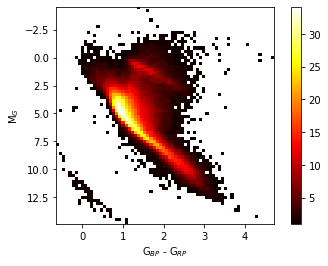

In [5]:
# Now we make the plot

challenge_data = pd.read_csv('data/bonus100k.csv') #load data

# make a density heatmap. Note that there are other ways to create heatmaps too, feel free to use any of them.
plt.figure()

# np.histogram2d function is a numpy function which takes the x and y axes 
# and the bins (they do bucketing or discretization of the data and are used for smoothening noisy data 
# - try changing their values and see the effect) as its parameters.
# The function returns the histogram and the bin edges along the two axes as its output.
heatmap, xedges, yedges = np.histogram2d(  
    challenge_data.bp_rp.values,
    challenge_data.g_abs.values,
    bins=70
) 

# Define the extent of heatmap in both axes
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

# Masking the heatmap array where the values are 0.0
heatmap = np.ma.masked_where(heatmap == 0.0, heatmap)

# Defining the colormap for a heatmap and setting colors as white for the masked values
color_map = plt.cm.hot
color_map.set_bad(color='white')
# Creating the heatmap (From paper: The colour scale represents the square root of the relative density of stars)
plt.imshow(
    np.sqrt(heatmap.T), 
    extent=extent, 
    cmap=color_map, 
    aspect=(extent[1]-extent[0])/(extent[3]-extent[2]), 
    origin='lower'
)
plt.colorbar()
plt.xlabel('G$_{BP}$ - G$_{RP}$')
plt.ylabel('M$_G$')
plt.gca().invert_yaxis()

# To make this look exactly like the figure from the paper, we'd just need to plot all stars in the Gaia catalogue

- **Challenge2: Go to Week1 Python and Jupyter Intro.ipynb and try making the 3D plot with the 10,000 closest stars data you fetched**

In [6]:
# Magic command for interactive 3D plots. 
%matplotlib notebook

fig=plt.figure(figsize = (10, 6))
# Define 3D axes
ax = plt.axes(projection ="3d")
# Plot the scatter graph using RA, Dec and distance. A colormap of Red-Yellow-Blue scale is used 
# with sizes s given by stellar radii (multiplied by 10 to make them well visible), 
# color c given by stellar effective temperature. Opacity is set by alpha
scatter_plot=ax.scatter3D(data_plot.ra, data_plot.dec, data_plot.dist,
              s=data_plot.radius_val*10, c=data_plot.teff_val, cmap='RdYlBu')

#Setting labels, title and a colorbar for the figure
ax.set_xlabel('RA [$\degree$]')
ax.set_ylabel('Dec [$\degree$]')
ax.set_zlabel('Distance [pc]')
plt.title('Closest Stars with known radius')
fig.colorbar(scatter_plot, label="Effective Stellar Temprature [K]")

<IPython.core.display.Javascript object>